<a href="https://colab.research.google.com/github/Adityakumarjha1997/Reunion_assignment/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **classification Model On Loan Default Using Machine Learning**

## 1. Introduction
The data set is given as an assignment which consists various detais regarding a customers historical data on loan history and different data sarrounding the same


In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1.1 **Importing all the required library.**

So let's start by installing Required librairis during the whole analysis

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od
import warnings


In [ ]:
od.download("https://drive.google.com/file/d/1d_h0sjQn1KnS8CYdBM6vCWRtqjWYRHEU/view?usp=sharing")

37422it [00:00, 122624409.60it/s]

Downloaded and unzipped to  ./applicant


In [ ]:
dff = pd.read_csv("/content/applicant/loan.csv")

In [ ]:
df = pd.read_csv("/content/applicant/applicant.csv")

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
data = pd.merge(df, dff, on="applicant_id")

In [ ]:
data_temp = list(data.columns)

In [ ]:
data_temp

['applicant_id',
 'Primary_applicant_age_in_years',
 'Gender',
 'Marital_status',
 'Number_of_dependents',
 'Housing',
 'Years_at_current_residence',
 'Employment_status',
 'Has_been_employed_for_at_least',
 'Has_been_employed_for_at_most',
 'Telephone',
 'Foreign_worker',
 'Savings_account_balance',
 'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
 'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
 'loan_application_id',
 'Months_loan_taken_for',
 'Purpose',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income',
 'Property',
 'Has_coapplicant',
 'Has_guarantor',
 'Other_EMI_plans',
 'Number_of_existing_loans_at_this_bank',
 'Loan_history',
 'high_risk_applicant']

In [ ]:
for i in data_temp:
  op = data[i].isna().sum()
  og = data[i].notna().sum()
  print(i, op)

applicant_id 0
Primary_applicant_age_in_years 0
Gender 0
Marital_status 0
Number_of_dependents 0
Housing 0
Years_at_current_residence 0
Employment_status 0
Has_been_employed_for_at_least 62
Has_been_employed_for_at_most 253
Telephone 596
Foreign_worker 0
Savings_account_balance 183
Balance_in_existing_bank_account_(lower_limit_of_bucket) 668
Balance_in_existing_bank_account_(upper_limit_of_bucket) 457
loan_application_id 0
Months_loan_taken_for 0
Purpose 12
Principal_loan_amount 0
EMI_rate_in_percentage_of_disposable_income 0
Property 154
Has_coapplicant 0
Has_guarantor 0
Other_EMI_plans 814
Number_of_existing_loans_at_this_bank 0
Loan_history 0
high_risk_applicant 0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [ ]:
data.describe()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,35.546000,1.155000,2.845000,0.963000,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,2.286764e+05,11.375469,0.362086,1.103718,0.188856,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,1.105364e+06,19.000000,1.000000,1.000000,0.000000,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.321398e+06,27.000000,1.000000,2.000000,1.000000,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1.529114e+06,33.000000,1.000000,3.000000,1.000000,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,1.707752e+06,42.000000,1.000000,4.000000,1.000000,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,1.903505e+06,75.000000,2.000000,4.000000,1.000000,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


Lets take a view at the statstical parameters using describe

## 2. **Data cleaning and analysis**


### 2.1 Visulising and detecting the nan Values

Text(0.5, 1.0, 'Detecting nan values in categorical data')

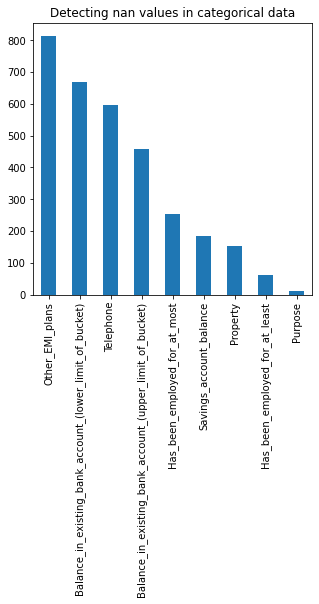

In [ ]:
missing_cat = [var for var in data.columns if data[var].isna().mean() > 0 and data[var].dtype == 'O']
plt.figure(figsize=(5,5))
data[missing_cat].isna().sum().sort_values(ascending = False).plot.bar()
plt.title('Detecting nan values in categorical data')

Above step is to visualize the nan values present in categorical set with in the data

In [ ]:
data.shape

(1000, 27)

In [ ]:
cat = data.select_dtypes('object')

cat over here detrmines the categorical data present with in the data

In [ ]:
cat.isna().sum()

Gender                                                        0
Marital_status                                                0
Housing                                                       0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
loan_application_id                                           0
Purpose                                                      12
Property                                                    154
Other_EMI_plans                                             814
Loan_history                                                  0
dtype: int64

In [ ]:
data.drop(["applicant_id","Other_EMI_plans","Telephone",
           "Balance_in_existing_bank_account_(lower_limit_of_bucket)",
           "Balance_in_existing_bank_account_(upper_limit_of_bucket)","loan_application_id"], axis = 1, inplace = True)

Removing features where nan data is missing by 30% of total data avilable

In [ ]:
data.isna().sum().to_frame(name='my_new_df_column_no_name')['my_new_df_column_no_name'].sort_values(ascending = False)[:5]

Has_been_employed_for_at_most     253
Savings_account_balance           183
Property                          154
Has_been_employed_for_at_least     62
Purpose                            12
Name: my_new_df_column_no_name, dtype: int64

left over features where there are still  nan values are present let us deal with it

In [ ]:
data[['Has_been_employed_for_at_most','Savings_account_balance','Property','Has_been_employed_for_at_least','Purpose']]

,Has_been_employed_for_at_most,Savings_account_balance,Property,Has_been_employed_for_at_least,Purpose
0,NaN,NaN,real estate,7 years,electronic equipment
1,4 years,Low,real estate,1 year,electronic equipment
2,7 years,Low,real estate,4 years,education
3,7 years,Low,building society savings agreement/life insurance,4 years,FF&E
4,4 years,Low,NaN,1 year,new vehicle
...,...,...,...,...,...
995,7 years,Low,real estate,4 years,FF&E
996,4 years,Low,building society savings agreement/life insurance,1 year,used vehicle
997,NaN,Low,car or other,7 years,electronic equipment
998,4 years,Low,NaN,1 year,electronic equipment


As we observe there is a alpha numeric feature let us split the data and make new feature out of it stating "employed_at_most", "employed_at_least"

In [ ]:
for var in ['Savings_account_balance','Property']:
  data[var].fillna(data[var].mode()[0], inplace=True)

lets replace few catagorical data with mode as it will help in modelling in future

### 2.2 Converting alphanumeric columns to create new features

In [ ]:
 data["employed_at_most"] = data.Has_been_employed_for_at_most.str.split(expand = True)[0]
 data["employed_at_least"] = data.Has_been_employed_for_at_least.str.split(expand = True)[0]

In [ ]:
data["employed_at_most"].fillna(3, inplace = True)
data["employed_at_least"].fillna(3, inplace = True)

lets replace the mean 3 in place of missing values in the above funtion

In [ ]:
data["employed_at_most"] = data["employed_at_most"].astype('int64')


In [ ]:
data["employed_at_least"] = data["employed_at_least"].astype('int64')

In [ ]:
data.drop(['Has_been_employed_for_at_least','Has_been_employed_for_at_most'], axis = 1, inplace= True)

Since we have separated the numerical data from the alphanumerica data let us drop this features as there would be no use of this data in futuere

In [ ]:
data.dropna(inplace= True)

Droping the 12 nan values from purpose since if there is no purpose then how loan is valid

In [ ]:
len(data)

988

In [ ]:
data.isna().sum()

Primary_applicant_age_in_years                 0
Gender                                         0
Marital_status                                 0
Number_of_dependents                           0
Housing                                        0
Years_at_current_residence                     0
Employment_status                              0
Foreign_worker                                 0
Savings_account_balance                        0
Months_loan_taken_for                          0
Purpose                                        0
Principal_loan_amount                          0
EMI_rate_in_percentage_of_disposable_income    0
Property                                       0
Has_coapplicant                                0
Has_guarantor                                  0
Number_of_existing_loans_at_this_bank          0
Loan_history                                   0
high_risk_applicant                            0
employed_at_most                               0
employed_at_least   

Here we conclude there are no more missing values with in the data

In [ ]:
data.corr()

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant,employed_at_most,employed_at_least
Primary_applicant_age_in_years,1.000000,0.117069,0.262379,0.003681,-0.043099,0.028092,0.056261,-0.016528,-0.032255,0.150848,-0.093679,-0.059061,0.362949
Number_of_dependents,0.117069,1.000000,0.041654,-0.081004,-0.017073,0.020776,-0.071064,-0.040225,0.039227,0.105987,-0.004177,0.039401,0.088505
Years_at_current_residence,0.262379,0.041654,1.000000,0.050023,0.028927,0.028519,0.049302,0.004420,-0.032442,0.090419,0.004351,-0.004495,0.309922
Foreign_worker,0.003681,-0.081004,0.050023,1.000000,0.152118,0.079046,0.082801,-0.075447,-0.101114,0.005712,0.091465,-0.016803,0.059504
Months_loan_taken_for,-0.043099,-0.017073,0.028927,0.152118,1.000000,0.623414,0.082960,0.023076,-0.039037,-0.008414,0.213325,0.087341,0.057164
Principal_loan_amount,0.028092,0.020776,0.028519,0.079046,0.623414,1.000000,-0.264803,0.027754,-0.061272,0.018994,0.143898,0.033158,0.043560
EMI_rate_in_percentage_of_disposable_income,0.056261,-0.071064,0.049302,0.082801,0.082960,-0.264803,1.000000,-0.005422,-0.011492,0.022415,0.076779,0.013795,0.121067
Has_coapplicant,-0.016528,-0.040225,0.004420,-0.075447,0.023076,0.027754,-0.005422,1.000000,-0.046018,-0.018600,0.057691,-0.029475,0.011178
Has_guarantor,-0.032255,0.039227,-0.032442,-0.101114,-0.039037,-0.061272,-0.011492,-0.046018,1.000000,-0.021359,-0.052256,0.064337,-0.046550
Number_of_existing_loans_at_this_bank,0.150848,0.105987,0.090419,0.005712,-0.008414,0.018994,0.022415,-0.018600,-0.021359,1.000000,-0.048705,0.040394,0.155038


In [ ]:
num = list(data.select_dtypes('int64')) 

### 2.3 Analyzing the correlation between the target and the features using heat map

[Text(0.5, 1.0, 'Correlation analysis')]

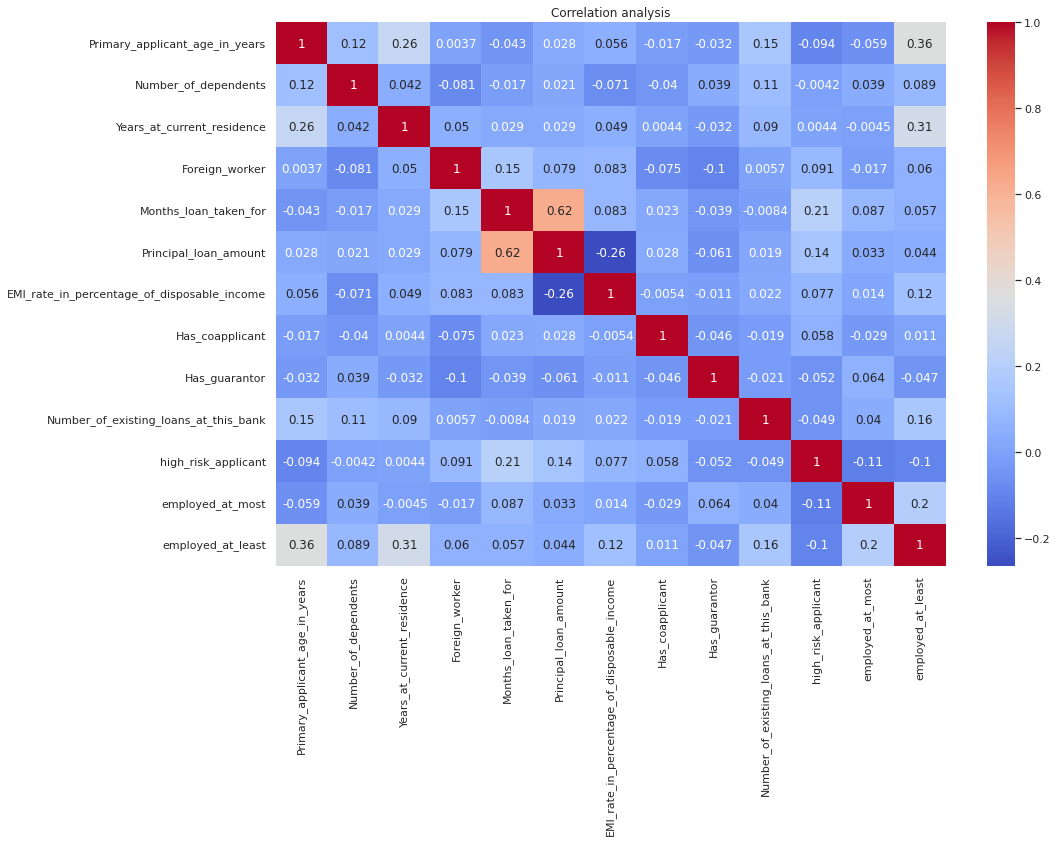

In [ ]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(data[num].corr(), annot = True, fmt='.2g',cmap= 'coolwarm').set(title = 'Correlation analysis')

### 2.4 Normalizing data

Primary_applicant_age_in_years
1.0283191221325787


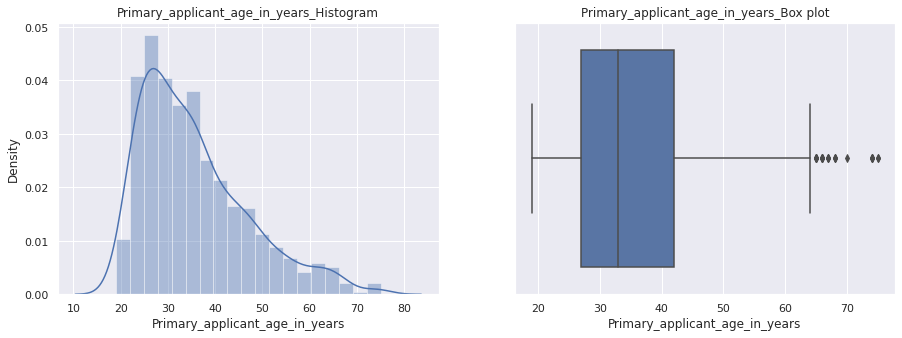

Number_of_dependents
1.9109774187096522


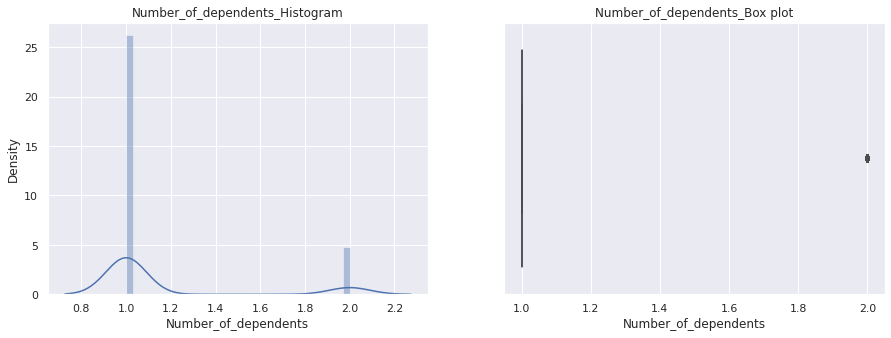

Years_at_current_residence
-0.26522927026227683


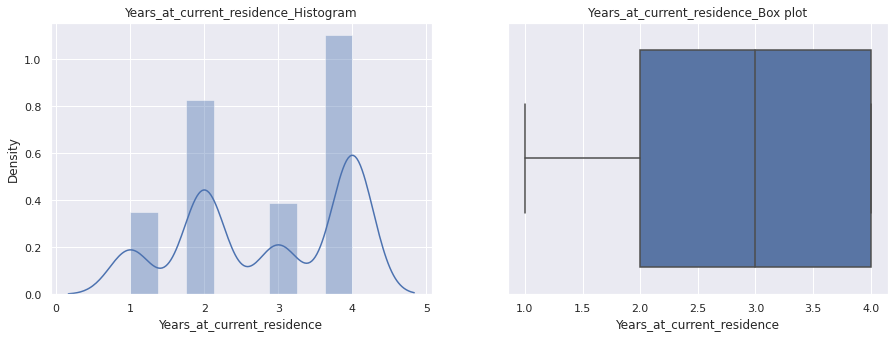

Foreign_worker
-4.9554817696103255


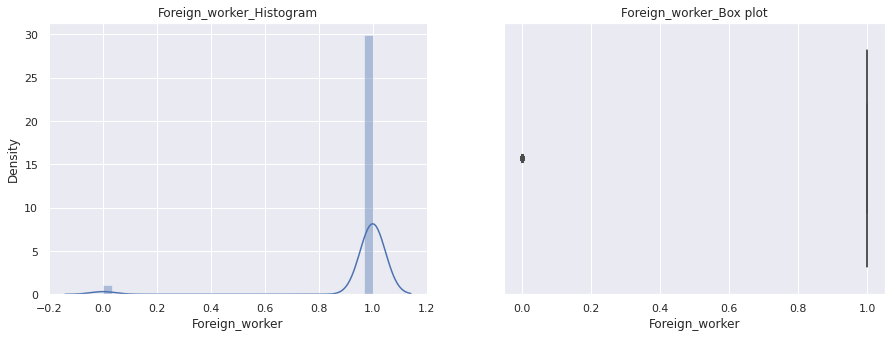

Months_loan_taken_for
1.099560304133735


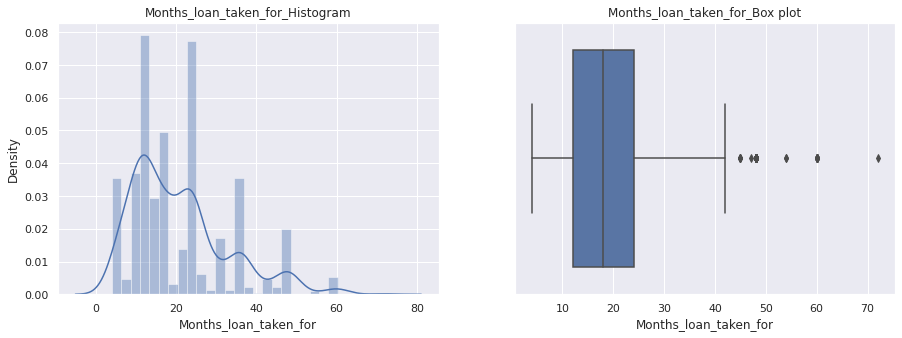

Principal_loan_amount
1.873227304516415


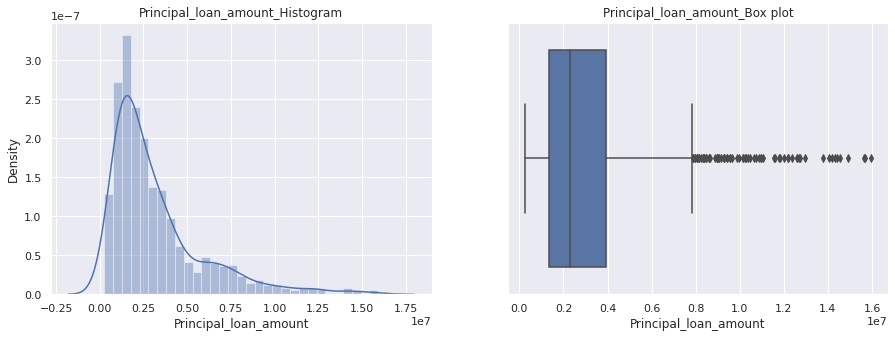

EMI_rate_in_percentage_of_disposable_income
-0.5391883024973031


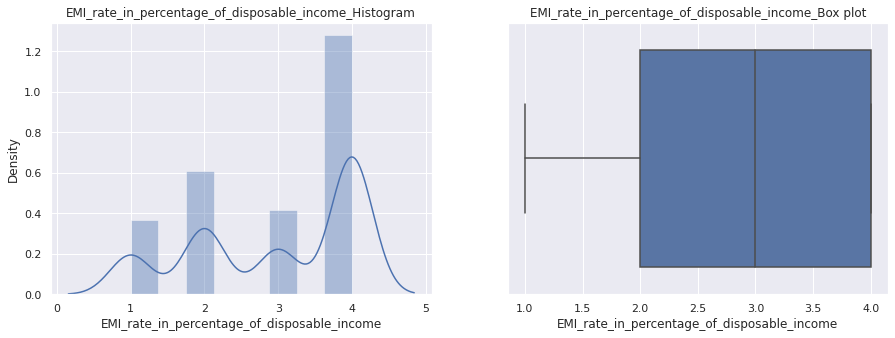

Has_coapplicant
4.879948164829045


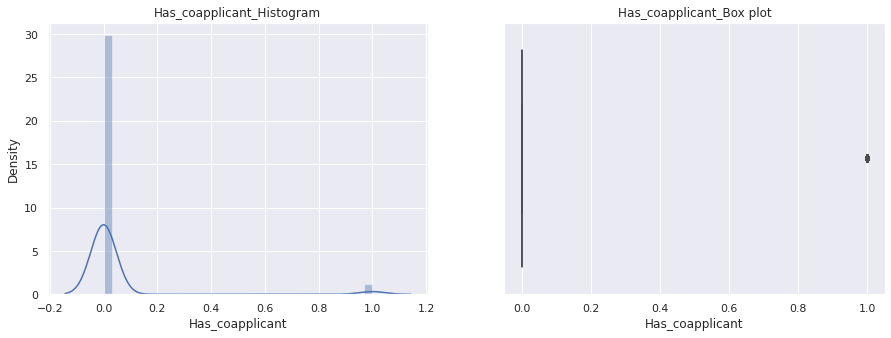

Has_guarantor
4.059186187576096


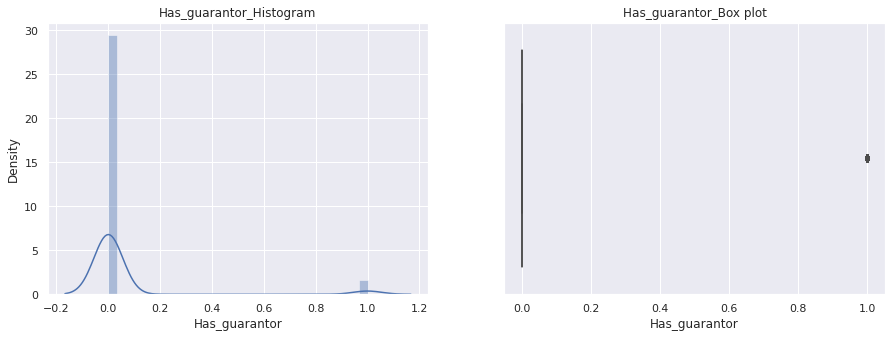

Number_of_existing_loans_at_this_bank
1.2842514063390844


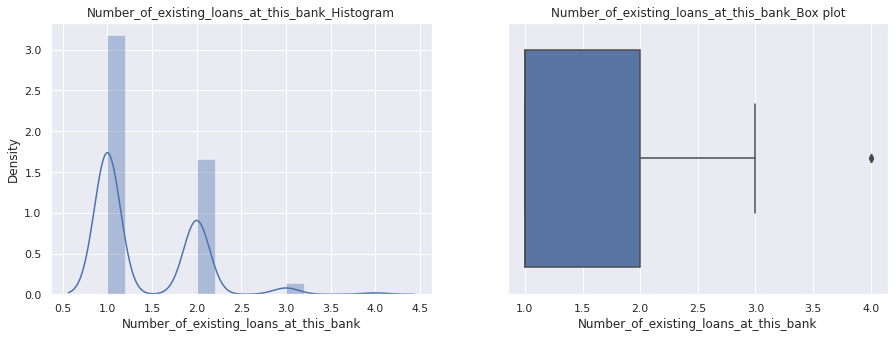

high_risk_applicant
0.8815878182156791


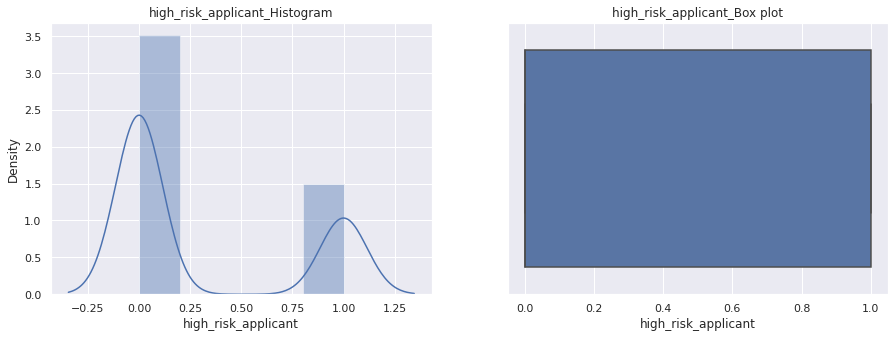

employed_at_most
0.2507214435238507


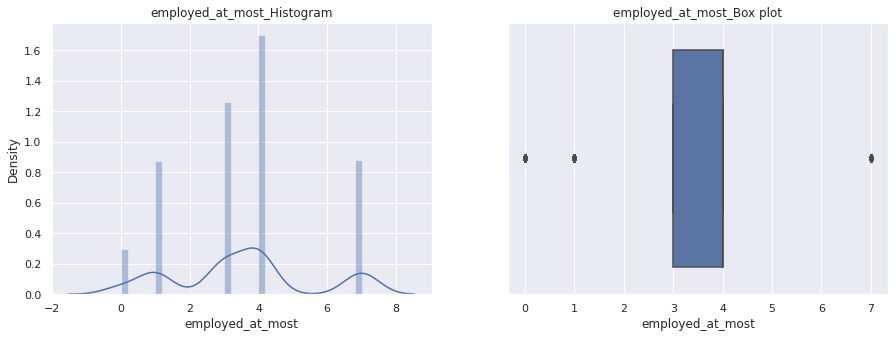

employed_at_least
0.4858910067096482


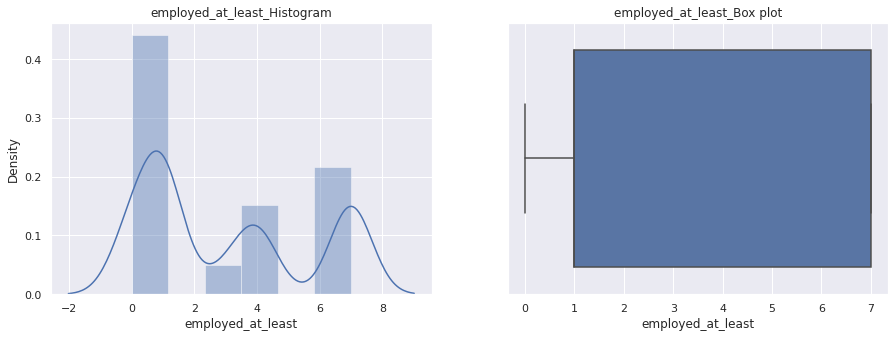

In [ ]:
for i in data[num]:

       print(i)
       print(data[i].skew())

       plt.figure(figsize=(15,5))
       plt.subplot(1,2,1)
       plt.title(i + '_Histogram')
       sns.distplot(data[i])

       plt.subplot(1,2,2)
       sns.boxplot(data[i])
       plt.title(i + '_Box plot')
       plt.show()


Few feature are little skewd let us noramalize the data using quartiles 

In [ ]:
data.skew()

Primary_applicant_age_in_years                 1.028319
Number_of_dependents                           1.910977
Years_at_current_residence                    -0.265229
Foreign_worker                                -4.955482
Months_loan_taken_for                          1.099560
Principal_loan_amount                          1.873227
EMI_rate_in_percentage_of_disposable_income   -0.539188
Has_coapplicant                                4.879948
Has_guarantor                                  4.059186
Number_of_existing_loans_at_this_bank          1.284251
high_risk_applicant                            0.881588
employed_at_most                               0.250721
employed_at_least                              0.485891
dtype: float64

As we observe in the data few features are skewd we need to normalize the data. since the data consisting lot of binary values we wont normalize those features rather i see only two features that could be normalized let's normalize the data

In [ ]:
skewd_list = ["Months_loan_taken_for", "Principal_loan_amount"]

In [ ]:
def find_boundries(df, variable):

       Q1 = df[variable].quantile(.25)
       Q3 = df[variable].quantile(.75)
       iqr = Q3 - Q1

       lower_boundry = Q1 - 1.5 * iqr
       upper_boundry = Q3 + 1.5 * iqr

       return lower_boundry, upper_boundry
       

In [ ]:
for i in skewd_list:

       Lower_boundry, upper_boundry = find_boundries(data, i)
       data[i] = np.where(data[i] > upper_boundry, upper_boundry, np.where(data[i] < Lower_boundry,Lower_boundry, data[i]))

we are replacing the outlier with value at the upper boundry and lower boundry to normalize two of the features

Months_loan_taken_for
0.6361201612655626


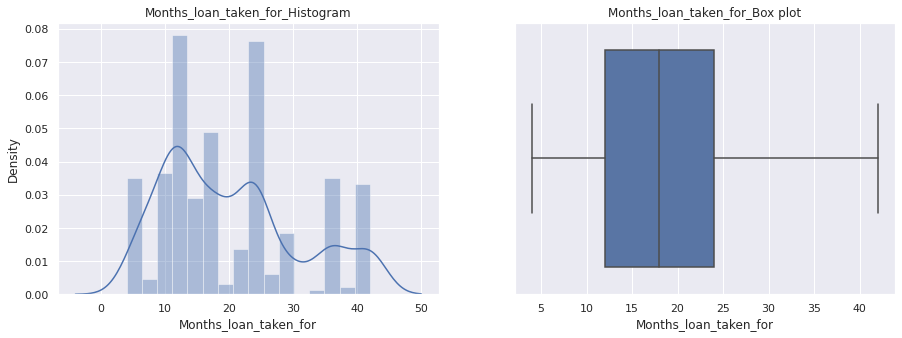

Principal_loan_amount
1.0403974763631518


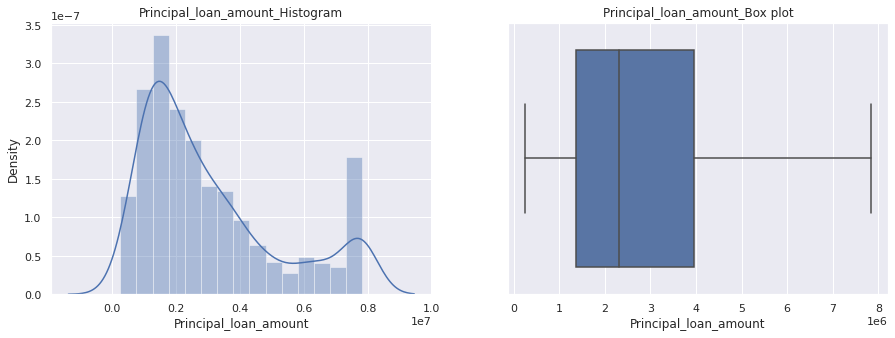

In [ ]:
for i in data[skewd_list]:

       print(i)
       print(data[i].skew())

       plt.figure(figsize=(15,5))
       plt.subplot(1,2,1)
       plt.title(i + '_Histogram')
       sns.distplot(data[i])

       plt.subplot(1,2,2)
       sns.boxplot(data[i])
       plt.title(i + '_Box plot')
       plt.show()


Now as we look both data look uniformliy distributed

In [ ]:
data.Gender.value_counts()

male      681
female    307
Name: Gender, dtype: int64

In [ ]:
temp = list(data.select_dtypes('int64'))
len(temp)

11

In [ ]:
data.groupby(['Gender'])[temp].mean()

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant,employed_at_most,employed_at_least
Gender,,,,,,,,,,,
female,32.635179,1.045603,2.863192,0.980456,2.830619,0.039088,0.045603,1.325733,0.348534,3.172638,2.208469
male,36.781204,1.204112,2.829662,0.955947,3.042584,0.036711,0.054332,1.441997,0.276065,3.675477,3.333333


this are the observations where we can see how applicants or diffentiated on various capabilites that  were presented in the features and insights would be filled in the insights window

In [ ]:
data.columns

Index(['Primary_applicant_age_in_years', 'Gender', 'Marital_status',
       'Number_of_dependents', 'Housing', 'Years_at_current_residence',
       'Employment_status', 'Foreign_worker', 'Savings_account_balance',
       'Months_loan_taken_for', 'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant', 'employed_at_most', 'employed_at_least'],
      dtype='object')

In [ ]:
data.groupby(['Loan_history'])['Principal_loan_amount','Number_of_existing_loans_at_this_bank','EMI_rate_in_percentage_of_disposable_income'].count()*100/len(data['Loan_history'])

,Principal_loan_amount,Number_of_existing_loans_at_this_bank,EMI_rate_in_percentage_of_disposable_income
Loan_history,,,
all loans at this bank paid back duly,4.757085,4.757085,4.757085
critical/pending loans at other banks,29.352227,29.352227,29.352227
delay in paying off loans in the past,8.704453,8.704453,8.704453
existing loans paid back duly till now,53.238866,53.238866,53.238866
no loans taken/all loans paid back duly,3.947368,3.947368,3.947368


With in the data set we see this trend where in more then 50% of the applicents have returned back the money which was lended and 29% have critical loan pending

In [ ]:
data.skew()

Primary_applicant_age_in_years                 1.028319
Number_of_dependents                           1.910977
Years_at_current_residence                    -0.265229
Foreign_worker                                -4.955482
Months_loan_taken_for                          0.636120
Principal_loan_amount                          1.040397
EMI_rate_in_percentage_of_disposable_income   -0.539188
Has_coapplicant                                4.879948
Has_guarantor                                  4.059186
Number_of_existing_loans_at_this_bank          1.284251
high_risk_applicant                            0.881588
employed_at_most                               0.250721
employed_at_least                              0.485891
dtype: float64

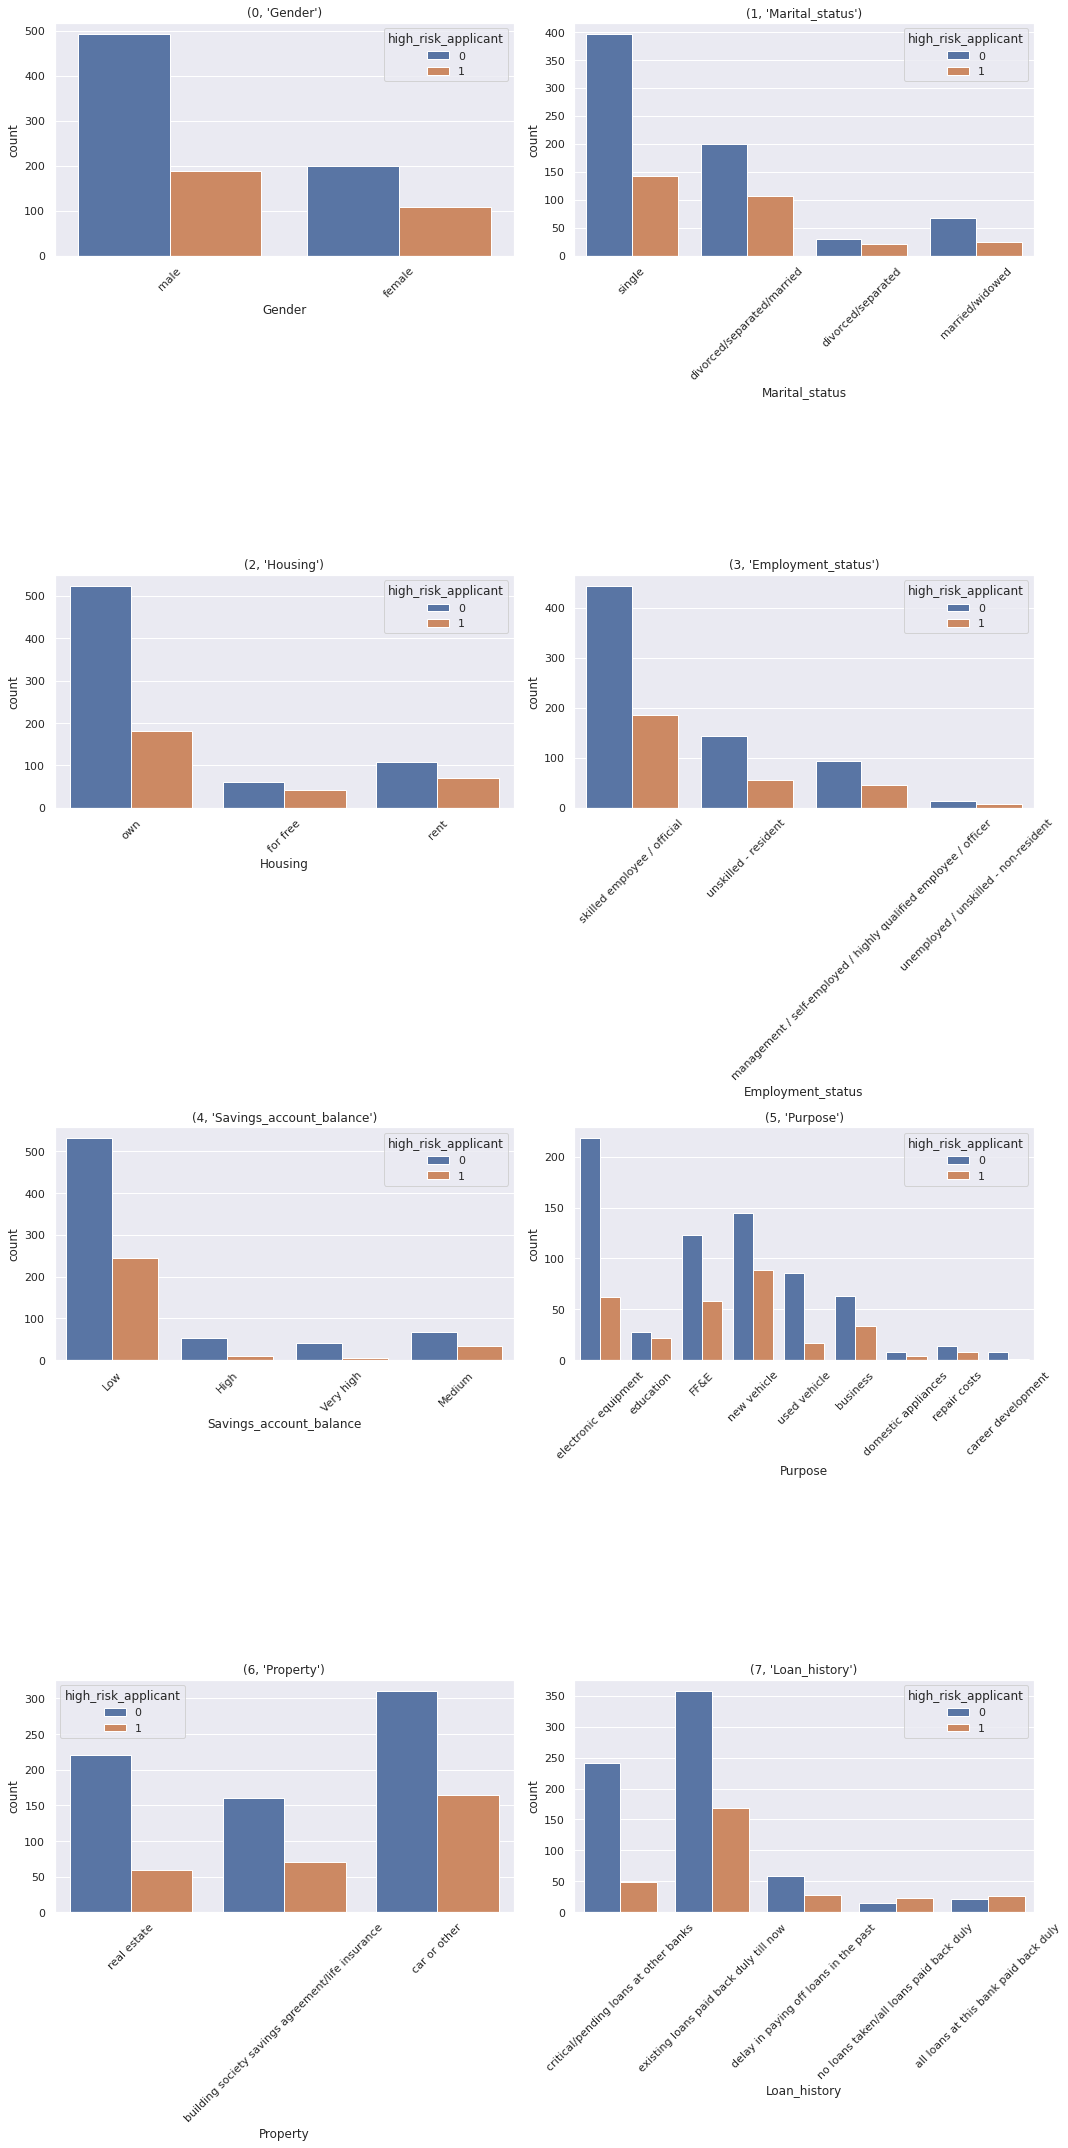

In [ ]:
plt.figure(figsize=(15,30))

for i in enumerate(data.select_dtypes('object').columns):
  plt.subplot(4,2,i[0]+1)
  plt.title(i)
  sns.countplot(i[1], data = data, hue = 'high_risk_applicant')
  plt.xticks(rotation = 45)
  plt.tight_layout()


In [ ]:
cat_list = list(data.select_dtypes('object').columns)
cat_list

['Gender',
 'Marital_status',
 'Housing',
 'Employment_status',
 'Savings_account_balance',
 'Purpose',
 'Property',
 'Loan_history']

In [ ]:
data["Loan_history"].unique()

array(['critical/pending loans at other banks',
       'existing loans paid back duly till now',
       'delay in paying off loans in the past',
       'no loans taken/all loans paid back duly',
       'all loans at this bank paid back duly'], dtype=object)

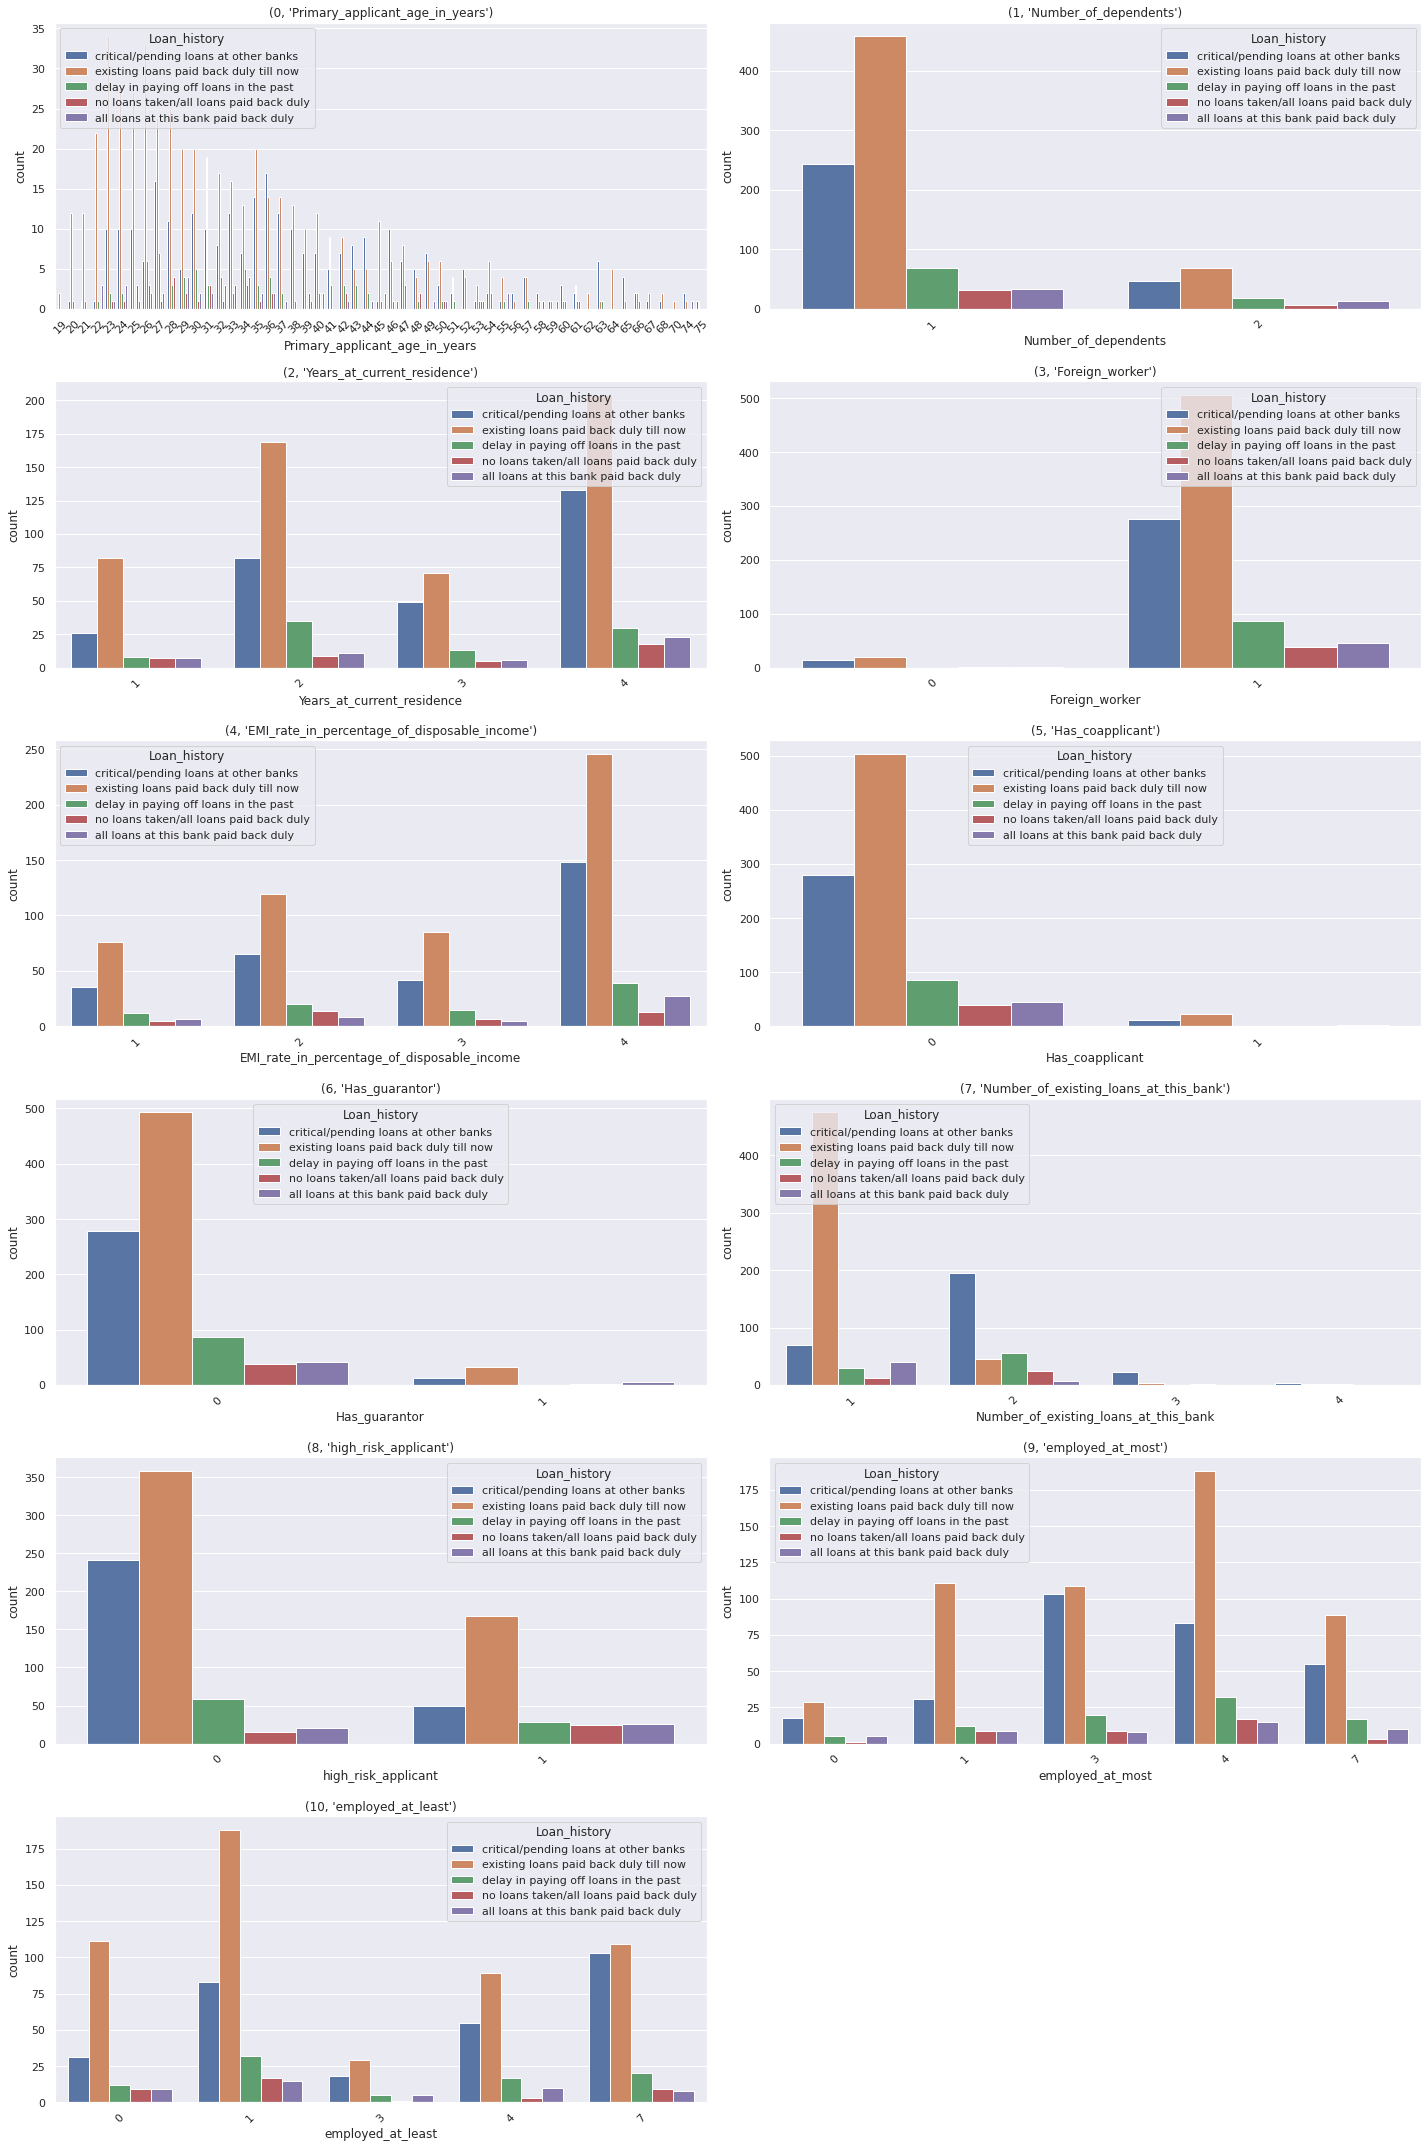

In [ ]:
plt.figure(figsize=(20,30))

for i in enumerate(data.select_dtypes('int64').columns):
  plt.subplot(6,2,i[0]+1)
  plt.title(i)
  sns.countplot(i[1], data= data, hue = 'Loan_history')
  plt.xticks(rotation = 45)
  plt.tight_layout()



we can see many observations with in this graphs we will discuss about this in the insights window

In [ ]:
data.columns

Index(['Primary_applicant_age_in_years', 'Gender', 'Marital_status',
       'Number_of_dependents', 'Housing', 'Years_at_current_residence',
       'Employment_status', 'Foreign_worker', 'Savings_account_balance',
       'Months_loan_taken_for', 'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant', 'employed_at_most', 'employed_at_least'],
      dtype='object')

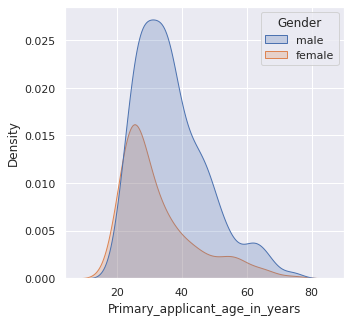

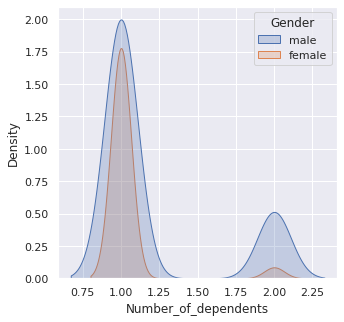

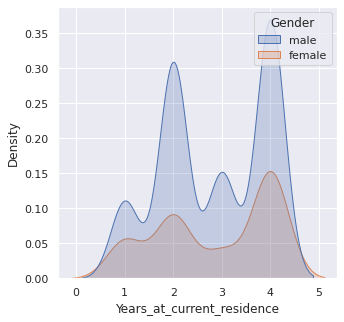

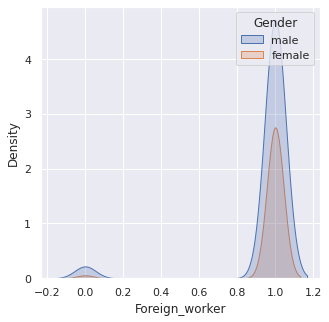

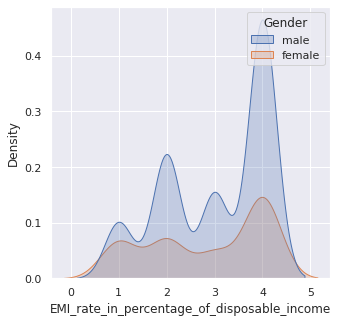

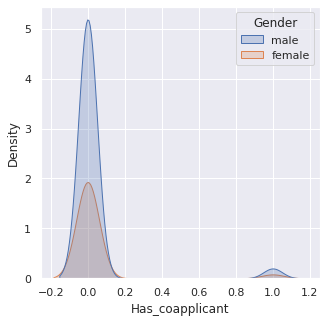

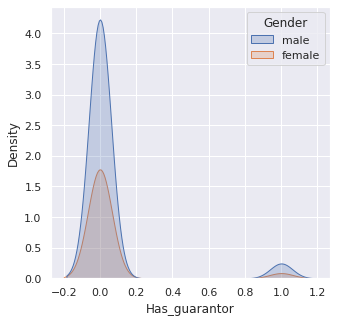

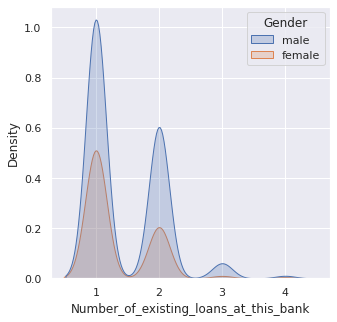

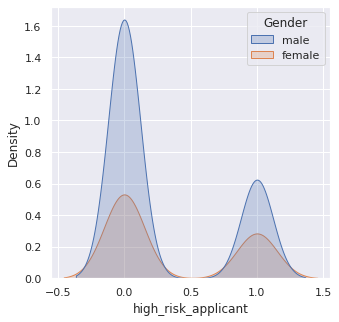

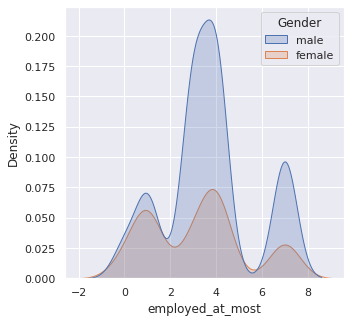

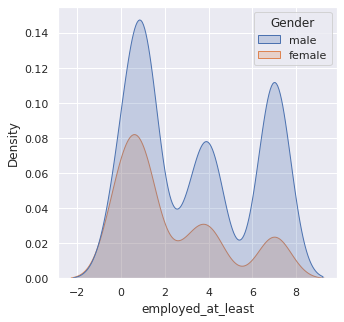

In [ ]:
for col in temp:
  plt.figure(figsize=(5,5))
  sns.kdeplot(data[col], shade = True, hue = data['Gender'])


we observe that male applicants are more compared to women as per the density

In [ ]:
data['Employment_status'].value_counts()*100/len(data['Employment_status'])

skilled employee / official                                         63.663968
unskilled - resident                                                20.141700
management / self-employed / highly qualified employee / officer    14.068826
unemployed / unskilled - non-resident                                2.125506
Name: Employment_status, dtype: float64

63% percent of appliacnts are skilled employees so they will be provided loan

In [ ]:
data['Housing'].value_counts()*100/len(data['Housing'])

own         71.356275
rent        18.117409
for free    10.526316
Name: Housing, dtype: float64

71% percent applicants have their own house and they are likily to be provide with loans

Will use the same data set to process our machine learning model 

Insights

Plots above convey following things about the dataset:

1. Loan Approval Status: About 2/3rd of applicants have been granted loan.

2. Gender: There are more Men than Women (approx. 3x)

3. Martial Status: 2/3rd of the applicant in the dataset is Marred; Married applicants are more likely to be granted loans.

4. Dependents: Majority of the applicant have 1 dependents and they are likely to accepted for loan.

5. Education: About 5/6th of the applicant is Graduate and graduates have higher propotion of loan approval

6. Employment: 63% of applicant is skilled employee and they have higher propotion of loan approval

7. 71% of the applicant own a house and they are likly to be provided with the loans 

8. Applicant with credit history are far more likely to be accepted.

9. Buying Electronic equipment is the most comman case when it comes to taking loans 

10. Who are residing at a residence above 4 years they are having the most number of critical loans

11. applicant having two loans simultaniusly are under critical loan under loan history 

12. Among high risk applicant women are more compared to men

In [ ]:
data.to_csv('ml_project.csv')